# Word Embeddings

Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text. To the point the Word Embedding format generally tries to map a word using a dictionary to a vector.

## Prediction based Vector model

Word2vec is not a single algorithm but a combination of two techniques – CBOW(Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

## Word2vec

## CBOW

Continuous Bag of Words (CBOW) is basically a linear relationships between pair of words. In the continuous bag of words model, context is represented by multiple words for a given target words.

Refer:https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

In [139]:
import os
import gensim,logging
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
#Configuring the logging info
logging.basicConfig(format='%(asctime)s :  %(levelname)s : %(message)s',level=logging.ERROR)

In [141]:
#For memory management, let us iterate over the words in the sentences

class MySentences(object):
    def __init__(self,dirname):
        self.dirname=dirname
        
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname,fname)):
                yield line.split()
                
sentences=MySentences('/home/sharafath/words/')


## Develop Word2Vec Embedding

In [142]:

model=gensim.models.Word2Vec(sentences,min_count=1,sg=0,iter=200) # sg=0 means CBOW method, iter=200 i.e. (iter-1)=199 iterations over the neural network

In [143]:
words=list(model.wv.vocab)
print(model['scientific'])  #prints embedded vector for a specific word

[ -3.75339687e-02  -4.15839776e-02   7.21826311e-03  -4.88761719e-03
   6.11472788e-05   9.88720506e-02   2.50377972e-02   6.46963120e-02
   5.21197729e-03   4.06254036e-03  -1.55253066e-02   1.02847535e-02
  -3.24366167e-02  -4.26693298e-02   2.02877969e-02   2.74207294e-02
  -1.80558041e-02  -4.40759845e-02  -1.04285255e-02   3.42787080e-03
   3.45752612e-02  -3.93291004e-03   3.40651050e-02   5.37170283e-02
  -1.81992594e-02   6.07345486e-03  -8.43688659e-03   2.88416781e-02
  -1.45037593e-02  -7.41484202e-03   3.38669226e-04   2.36657839e-02
   3.44478479e-03  -1.59338731e-02   7.16534094e-04   1.63581315e-02
   4.46132524e-03  -9.78426635e-03  -1.82919130e-02   3.02408263e-02
  -1.22824376e-02  -1.44638040e-03  -2.60568466e-02  -4.51647788e-02
   2.36039907e-02   4.10945562e-04  -2.15720516e-02   1.12573029e-02
  -1.08934483e-02   1.52159836e-02   1.50862969e-02   4.07253653e-02
   9.34832823e-03   1.04301032e-02  -2.09822878e-03  -6.27604220e-03
   9.57994070e-03   8.94267857e-03

In [144]:
print(model) #Prints model description

Word2Vec(vocab=31, size=100, alpha=0.025)


### Retrieve all of the vectors from a trained model 

In [145]:
X=model[model.wv.vocab]
X

array([[-0.01724261, -0.01650786,  0.00091794, ...,  0.01856005,
        -0.00792299,  0.01045427],
       [-0.03107179, -0.03354353,  0.00630538, ...,  0.02981957,
        -0.00792492,  0.01779799],
       [-0.03365135, -0.04583357,  0.00570315, ...,  0.03515574,
        -0.00926953,  0.0163949 ],
       ..., 
       [-0.02358608, -0.03021421,  0.00551436, ...,  0.02789925,
        -0.01175696,  0.00942076],
       [-0.03348297, -0.03543371,  0.00080417, ...,  0.03443176,
        -0.01341706,  0.01516487],
       [-0.0201727 , -0.0246892 ,  0.00635403, ...,  0.0262581 ,
        -0.01101922,  0.00467088]], dtype=float32)

In [146]:
#create a 2-dimensional PCA model of the word vectors
pca=PCA(n_components=2)
result=pca.fit_transform(X)

### Visualize the word Embeddings

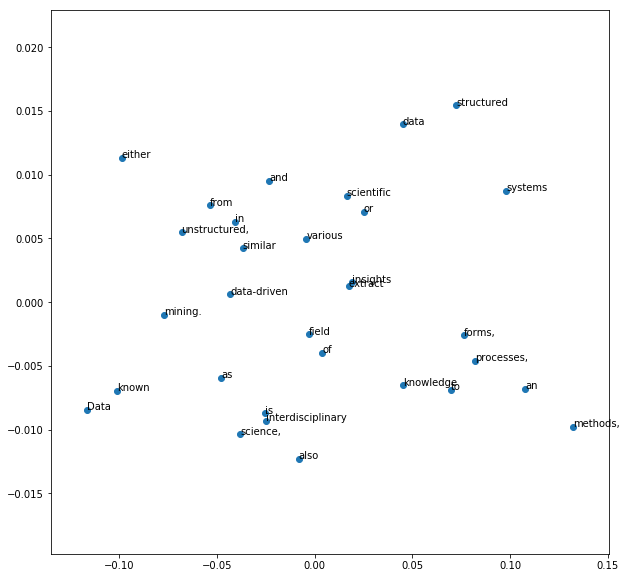

In [147]:
plt.figure(figsize=(10,10))
plt.scatter(result[:,0],result[:,1])

for i,word in enumerate(words):
    plt.annotate(word,xy=(result[i,0],result[i,1]))
    
plt.show()


In [148]:
most_similar_word=model.most_similar(positive=['systems', 'scientific'], negative=['field'], topn=1)
most_similar_word

[('methods,', 0.9773060083389282)]

## Skip-Gram Model

The skip-gram inverts contexts and targets, and tries to predict each context word from its target word, thus i can be said that the skip-gram is actually flips the CBOW architecture.

Refer:https://www.tensorflow.org/tutorials/word2vec

In [149]:
model2=gensim.models.Word2Vec(sentences,min_count=1,sg=1,iter=200)

In [150]:
words2=list(model2.wv.vocab)

#Retrieve the vectors of the vocab
X2=model2[model2.wv.vocab]

#create a 2-dimensional PCA model of the word vectors
pca2=PCA(n_components=2)
result2=pca2.fit_transform(X2)

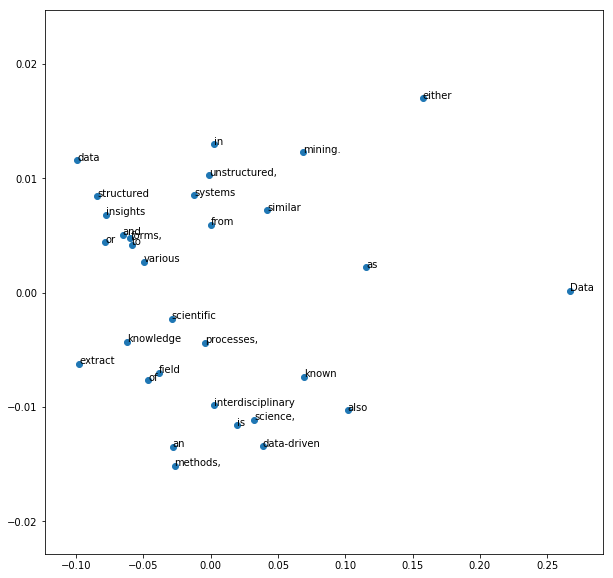

In [151]:
#Visualize the word embeddings
plt.figure(figsize=(10,10))
plt.scatter(result2[:,0],result2[:,1])

for i,word in enumerate(words2):
    plt.annotate(word,xy=(result2[i,0],result2[i,1]))
    
plt.show()

In [152]:
most_similar_word2=model2.most_similar(positive=['systems', 'scientific'], negative=['field'], topn=1)
most_similar_word2

[('structured', 0.9990314841270447)]

Thus from the above results, Skip-gram model returned significantly better prediction than CBOW model.